## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
import csv

input_file = 'bank-additional-full.csv'
output_file = 'bank-additional-full.csv'

with open(input_file, 'r') as infile:
    csv_reader = csv.reader(infile, delimiter=';')
    header = next(csv_reader)
    rows = [row for row in csv_reader]

with open(output_file, 'w') as outfile:
    csv_writer = csv.writer(outfile, delimiter=',')
    csv_writer.writerow(header)
    csv_writer.writerows(rows)

In [12]:
dataset = pd.read_csv('bank-additional-full.csv')
print(dataset)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [13]:
dataset["y"] = dataset["y"].map({'yes': 1, 'no':0}).astype(int)

bank_target = dataset[["y"]]
print(bank_target)


       y
0      0
1      0
2      0
3      0
4      0
...   ..
41183  1
41184  0
41185  0
41186  1
41187  0

[41188 rows x 1 columns]


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [38]:

bank_client = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week"]


for attribute in bank_client:
    print(attribute + ":", dataset[attribute].unique())



age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Максимальне значення age: 98
Мінімальне значення age: 17
Кількість NaN у age: 0


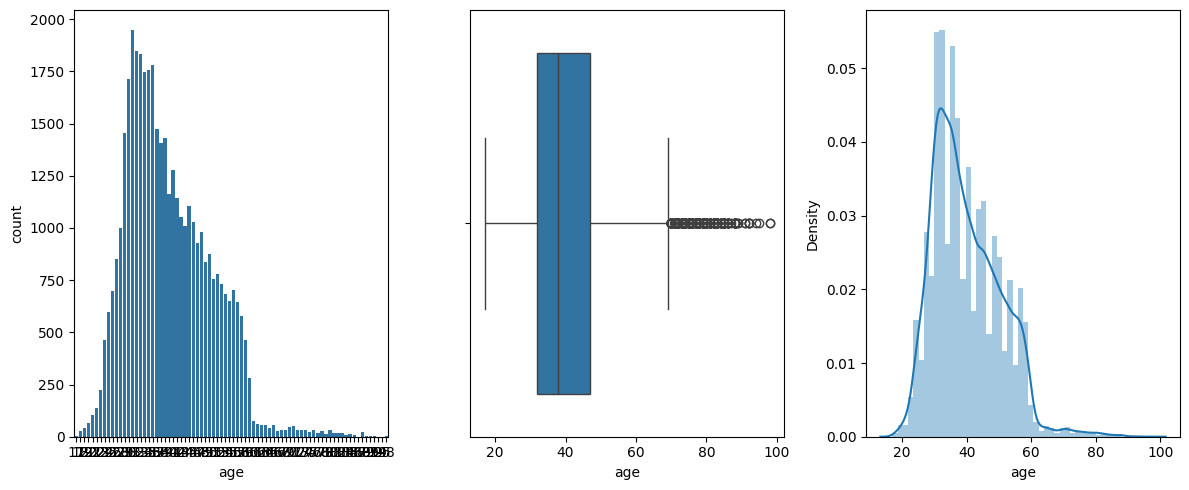

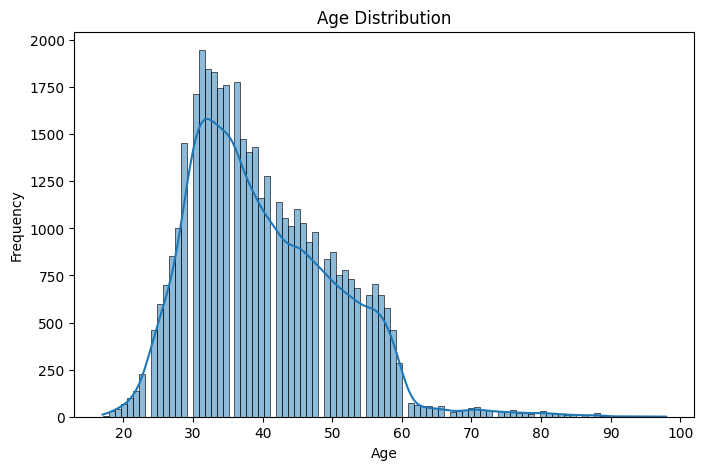

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Максимальне значення age:", dataset['age'].max())
print("Мінімальне значення age:", dataset['age'].min())
print("Кількість NaN у age:", dataset['age'].isna().sum())


plt.figure(figsize=(12, 5))


plt.subplot(1, 3, 1)
sns.countplot(data=dataset, x='age')


plt.subplot(1, 3, 2)
sns.boxplot(data=dataset, x='age')


plt.subplot(1, 3, 3)
sns.distplot(dataset['age'])

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(dataset['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



**Висновки з 1-4 завдання (детальні)**

1.   По нашому датасету можна проаналізувати, що середній вік клієнтів банку приблизно 40 років, переважна більшість клієнтів мають невелику кількість контактів,бо  75% значень розташовані у діапазоні до 3 контактів.
2.  По нашому цільовому атрибуті "contact", можна сказати що він був ідентифікований як бінарний, оскільки має лише два унікальних значення: "telephone" та "cellular" Ми його перетворили у чисельний.

3.По нашому датасеті можна проаналізувати, що ми маємо певну різноманітність клієнтів банку за різними соціальними та економічними характеристиками.


4. По нашим графікам ми баччимо, що середній вік клієнта це приблизно 40 років.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [41]:
import numpy as np
import pandas as pd

def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """
    sorted_data = np.sort(df[column])
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = dataset[(dataset[column] > up_lim) | (dataset[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers




In [42]:
outliers = detect_outliers_with_interquantile_range(dataset, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38452,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,1,2,2,success,-3.4,92.431,-26.9,0.73,5017.5,1
38455,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.73,5017.5,1


**Висновки з завдання 5 (детальні)**

1.   По нашому атрибуту Age можемо зауважити, що 10% клієнтів мають вік менше 28 років, а інші 90% мають вік менше 55 років.Викидами є клієнти вище 98 років, адже вони перевищують межу

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

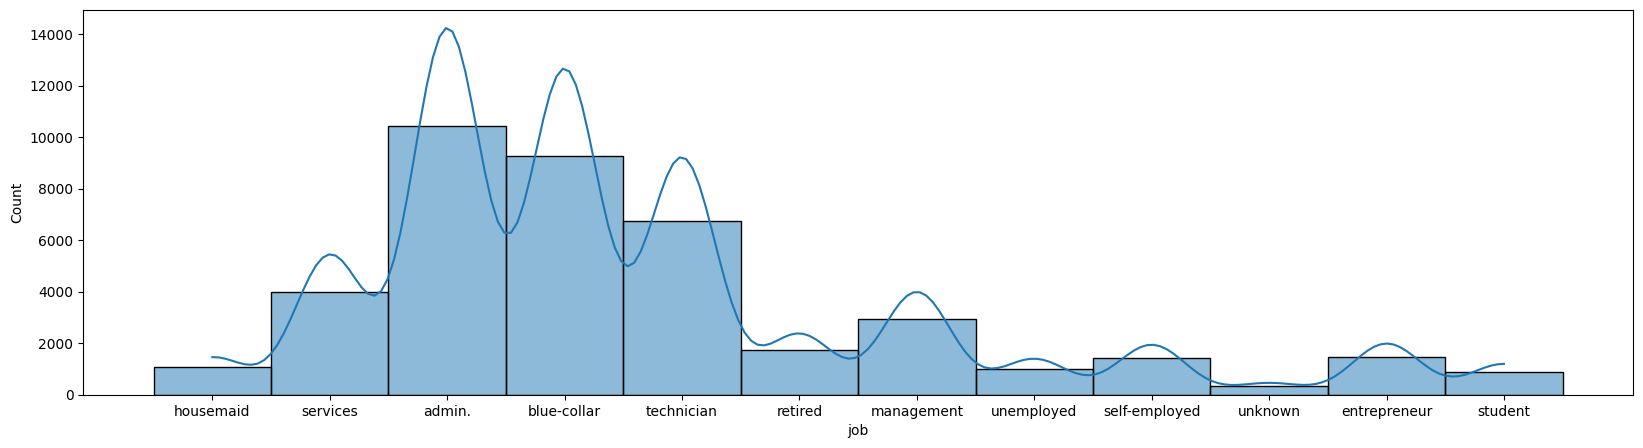

In [44]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(dataset['job'], kde=True)
plt.show()

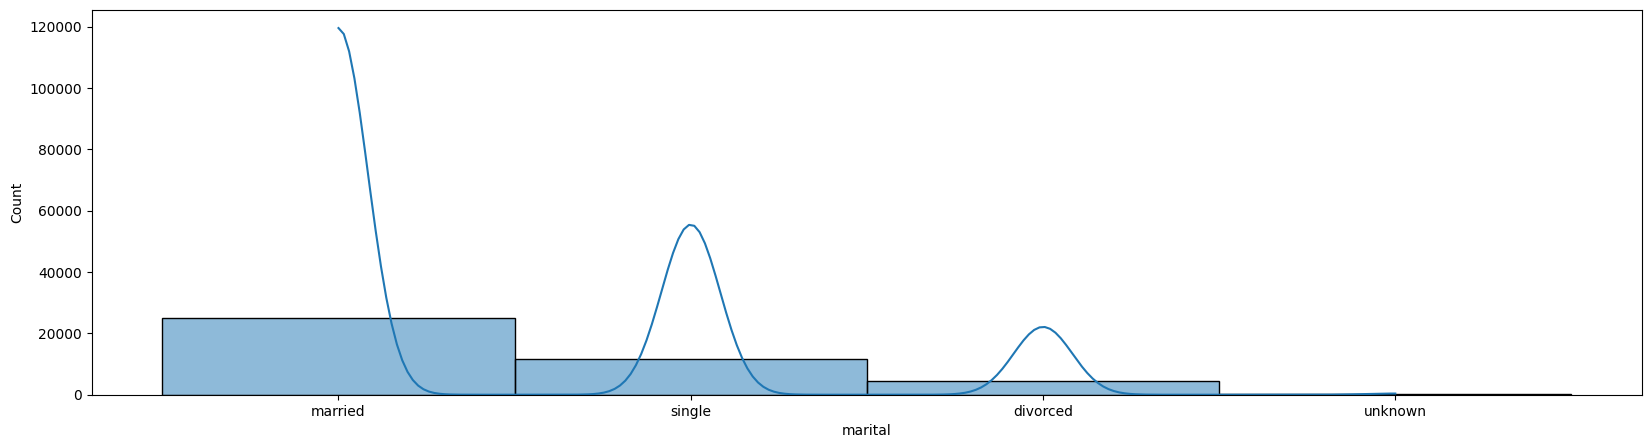

In [45]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(dataset['marital'], kde=True)
plt.show()

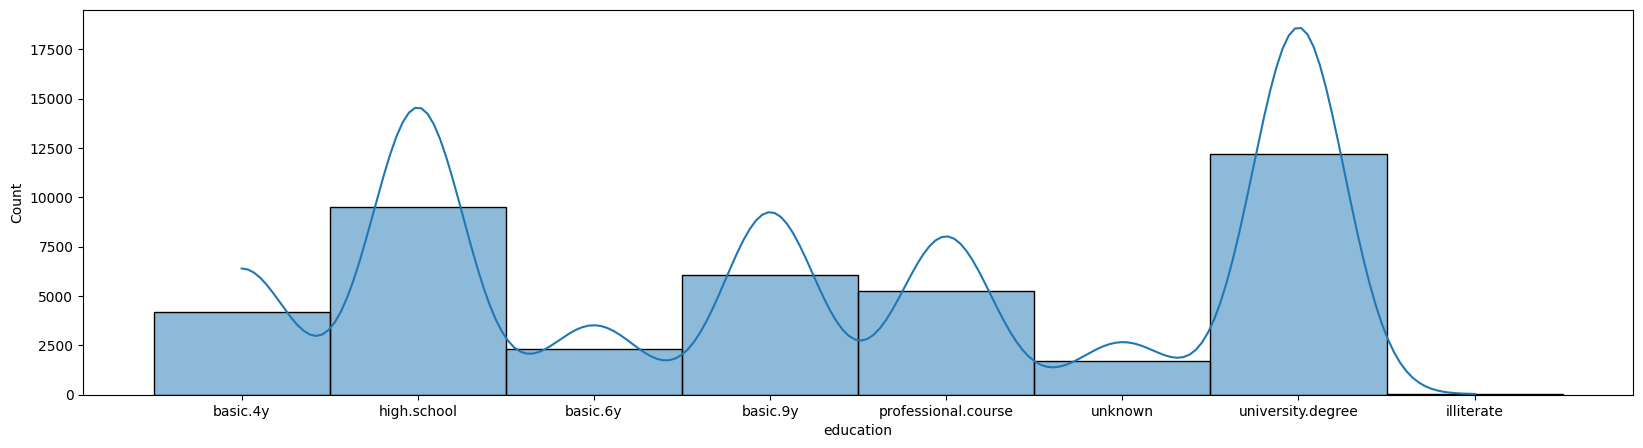

In [46]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(dataset['education'], kde=True)
plt.show()

**Висновки з завдання 6 (детальні)**

1.   Ми побудували графік розподілу даних між змінними, можемо зазначити по першому малюнку що найбільша кількість адміністраторів пацює, також ці люди які закінчили університет,а також більша кількість одружених людей

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

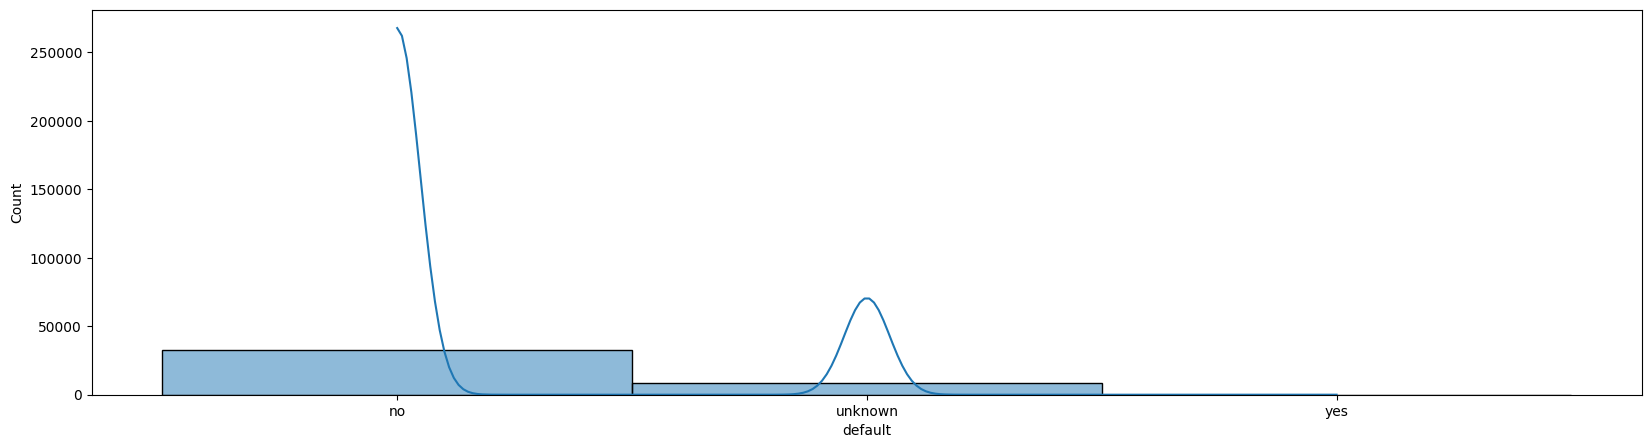

In [48]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(dataset['default'], kde=True)
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [54]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(dataset: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = dataset[col][dataset[col].notnull()]
        dataset[col] = le.fit_transform(not_null)
        print(f"Unique values for {col} after encoding: {dataset[col].unique()}")
      
    return dataset


In [56]:
bank_client = encode_categorical_columns(dataset, ['job', 'marital', 'education', 'default', 'housing',  'loan'])
print(bank_client)

Unique values for job after encoding: [ 3  7  0  1  9  5  4 10  6 11  2  8]
Unique values for marital after encoding: [1 2 0 3]
Unique values for education after encoding: [0 3 1 2 5 7 6 4]
Unique values for default after encoding: [0 1 2]
Unique values for housing after encoding: [0 2 1]
Unique values for loan after encoding: [0 2 1]
       age  job  marital  education  default  housing  loan    contact month  \
0       56    3        1          0        0        0     0  telephone   may   
1       57    7        1          3        1        0     0  telephone   may   
2       37    7        1          3        0        2     0  telephone   may   
3       40    0        1          1        0        0     0  telephone   may   
4       56    7        1          3        0        0     2  telephone   may   
...    ...  ...      ...        ...      ...      ...   ...        ...   ...   
41183   73    5        1          5        0        2     0   cellular   nov   
41184   46    1        

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [57]:
import pandas as pd

def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    
    dataframe: pd.DataFrame для кодування
    age_col: назва стовпця з віком
    """

    quartiles = dataframe[age_col].quantile([0.25, 0.5, 0.75])
    
  
    dataframe['Age_encoded'] = pd.qcut(dataframe[age_col], q=[0, 0.25, 0.5, 0.75, 1], labels=False)
    
    return dataframe


bank_client = pd.DataFrame({'age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]})



In [61]:
bank_client = encode_age(bank_client, 'age')
print(bank_client)

       age  job  marital  education  default  housing  loan    contact month  \
0       56    3        1          0        0        0     0  telephone   may   
1       57    7        1          3        1        0     0  telephone   may   
2       37    7        1          3        0        2     0  telephone   may   
3       40    0        1          1        0        0     0  telephone   may   
4       56    7        1          3        0        0     2  telephone   may   
...    ...  ...      ...        ...      ...      ...   ...        ...   ...   
41183   73    5        1          5        0        2     0   cellular   nov   
41184   46    1        1          5        0        0     0   cellular   nov   
41185   56    5        1          6        0        2     0   cellular   nov   
41186   44    9        1          5        0        0     0   cellular   nov   
41187   74    5        1          5        0        2     0   cellular   nov   

      day_of_week  ...  pdays  previous

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних
Атрибути, які спочатку були у форматі категорій, тепер представлені числовими значеннями.Вибірки можуть використовувати числові ідентифікатори замість текстових міток для представлення категоріальних даних. 

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [66]:
import pandas as pd


bank_relat = bank_client[['last_contact_date', 'last_contact_duration', 'num_contacts', 'prev_campaign_outcome']]
print(bank_relat)


print(bank_relat.isnull().sum())


  last_contact_date  last_contact_duration  num_contacts prev_campaign_outcome
0        2023-01-01                     10             1               success
1        2023-02-01                     20             2               failure
2        2023-03-01                     30             3               failure
3        2023-04-01                     40             4               success
4        2023-05-01                     50             5               unknown
last_contact_date        0
last_contact_duration    0
num_contacts             0
prev_campaign_outcome    0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [68]:
for column in bank_relat:
    if column not in ['duration']:
        print(f"Unique values in {column}:")
        print(bank_relat[column].unique())
        print("\n")



Unique values in last_contact_date:
['2023-01-01' '2023-02-01' '2023-03-01' '2023-04-01' '2023-05-01']


Unique values in last_contact_duration:
[10 20 30 40 50]


Unique values in num_contacts:
[1 2 3 4 5]


Unique values in prev_campaign_outcome:
['success' 'failure' 'unknown']




# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



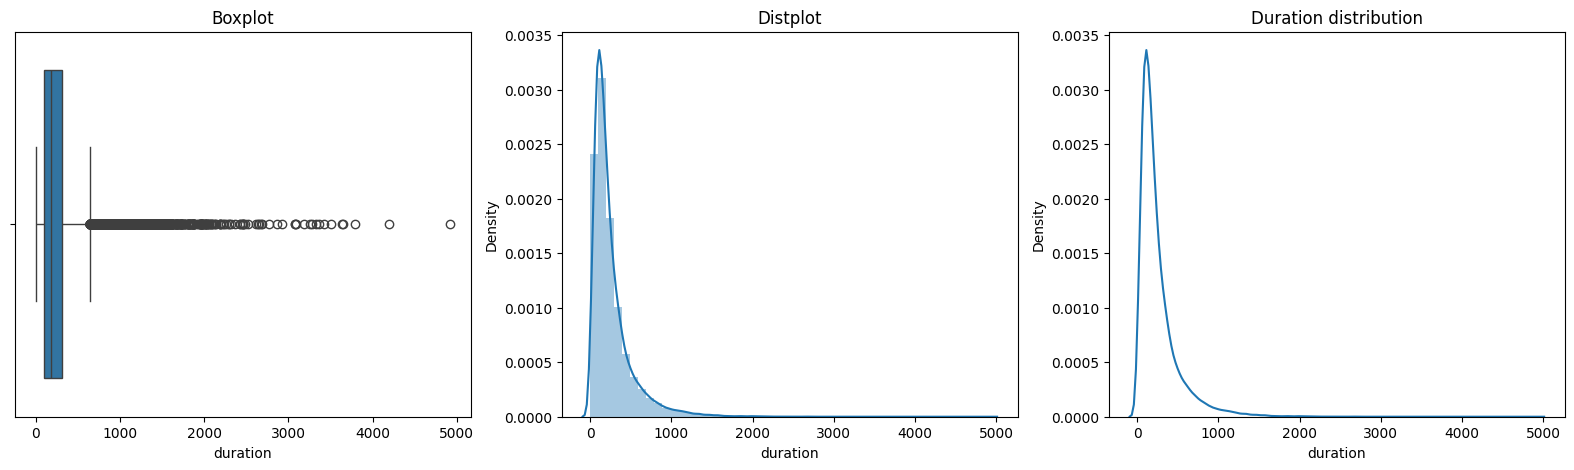

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(x='duration', data=dataset, ax=ax[0])
ax[0].set_title('Boxplot')
sns.distplot(dataset['duration'], ax=ax[1], kde=True, label='Histogram')
ax[1].set_title('Distplot')
sns.kdeplot(dataset['duration'], ax=ax[2], label='KDE')
ax[2].set_title('Duration distribution')

plt.show()


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [77]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(dataframe, columns):
    """
    dataframe: pd.DataFrame, датафрейм, в якому потрібно закодувати змінні
    columns: список назв категоріальних змінних, які потрібно закодувати
    """
    label_encoder = LabelEncoder()
    for col in columns:
        dataframe[col + '_encoded'] = label_encoder.fit_transform(dataframe[col])
    return dataframe



categorical_columns = ['contact', 'month', 'day_of_week']
bank_data_encoded = encode_categorical_columns(dataset, categorical_columns)


print(bank_data_encoded.head())


   age  job  marital  education  default  housing  loan    contact month  \
0   56    3        1          0        0        0     0  telephone   may   
1   57    7        1          3        1        0     0  telephone   may   
2   37    7        1          3        0        2     0  telephone   may   
3   40    0        1          1        0        0     0  telephone   may   
4   56    7        1          3        0        0     2  telephone   may   

  day_of_week  ...  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0         mon  ...           1.1          93.994          -36.4      4.857   
1         mon  ...           1.1          93.994          -36.4      4.857   
2         mon  ...           1.1          93.994          -36.4      4.857   
3         mon  ...           1.1          93.994          -36.4      4.857   
4         mon  ...           1.1          93.994          -36.4      4.857   

  nr.employed  y  Age_encoded  contact_encoded  month_encoded  \
0      51

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [78]:
import pandas as pd

def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    
    dataframe: pd.DataFrame для кодування
    duration_col: назва стовпця з duration
    """

    quartiles = dataframe[duration_col].quantile([0.25, 0.5, 0.75])

    dataframe['Duration_encoded'] = pd.qcut(dataframe[duration_col], q=[0, 0.25, 0.5, 0.75, 1], labels=False)
    
    return dataframe




In [79]:
bank_relat = encode_duration(dataset, 'duration')
print(bank_relat.head())

   age  job  marital  education  default  housing  loan    contact month  \
0   56    3        1          0        0        0     0  telephone   may   
1   57    7        1          3        1        0     0  telephone   may   
2   37    7        1          3        0        2     0  telephone   may   
3   40    0        1          1        0        0     0  telephone   may   
4   56    7        1          3        0        0     2  telephone   may   

  day_of_week  ...  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  \
0         mon  ...          93.994          -36.4      4.857       5191.0  0   
1         mon  ...          93.994          -36.4      4.857       5191.0  0   
2         mon  ...          93.994          -36.4      4.857       5191.0  0   
3         mon  ...          93.994          -36.4      4.857       5191.0  0   
4         mon  ...          93.994          -36.4      4.857       5191.0  0   

   Age_encoded  contact_encoded  month_encoded  day_of_week_en

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [81]:
social_economic_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
bank_socec = dataset[social_economic_columns].copy()

**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [82]:
import pandas as pd
bank_other = dataset[['campaign', 'pdays', 'previous', 'poutcome']].copy()

**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [83]:

poutcome_mapping = {'success': 1, 'failure': 0, 'other': -1}


dataset['poutcome'] = dataset['poutcome'].map(poutcome_mapping)


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [84]:
df = pd.concat([dataset, bank_other], axis=1)

bank_final = df[['poutcome']]



**Завдання 19** Провести ділення вибірки

In [95]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [96]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final,bank_target , 0.2, 10, 101)

In [97]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [98]:
X_train, X_test = scale_the_data(X_train, X_test)

ValueError: could not convert string to float: 'failure'

## Логістична Регресія

In [90]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

ValueError: could not convert string to float: 'failure'

## k-NN

In [99]:
neighbors = np.arange(0,25)
cv_scores = []
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py", line 238, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_base.py", line 476, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'failure'

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py", line 238, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_base.py", line 476, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'nonexistent'


In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

knnpred = knn.predict(X_test)
print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred), 2) * 100)

KNNCV = cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean()


## Метрики оцінки якості

In [ ]:
models = pd.DataFrame({
                'Models': ['LogisticRegression'],
                'Score':  [LOGCV]})

models.sort_values(by='Score', ascending=False)

**Висновки по моделям (детальні)**

1.  Наша логістична регресія та k-NN показали однакову точність на рівні 90% на тестовому наборі даних. Класи не завжди можуть бути збалансовані. У випадку якщо класи будуть незбалансовані ця метрика може бути не достатньо інформативною і може приховувати недоліки моделі у визначенні менш представлених класів.Також, можна розглянути використання методів збалансування класів, таких як зважена кросс-ентропія або використання технік вибіркового вивчення даних (undersampling або oversampling), для поліпшення ефективності моделей в умовах неспіввідношення кількості класів.